In [40]:
# Import needed modules
import pandas as pd

In [41]:
url = "https://raw.githubusercontent.com/hello-isa/co2_data/main/filtered_owid-co2-data.csv"

# Load dataframe
df = pd.read_csv(url)

# Check if dataframe is loaded
df.head(10)

,country,year,iso_code,population,gdp,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
0,Philippines,1910,PHL,7835476,1.234337e+10,0.051,-0.004,-6.667,94.289,9.852,...,0.0,0.0,0.0,2.182,0.0,0.838,0.0,0.001,0.001,0
1,Philippines,1911,PHL,7968898,1.314156e+10,0.037,-0.015,-28.571,95.154,0.865,...,0.0,0.0,0.0,2.206,0.0,0.837,0.0,0.001,0.001,0
2,Philippines,1912,PHL,8104619,1.336711e+10,0.004,-0.033,-90.000,107.396,12.241,...,0.0,0.0,0.0,2.528,0.0,0.836,0.0,0.001,0.001,0
3,Philippines,1913,PHL,8242677,1.477980e+10,0.007,0.004,100.000,107.399,0.004,...,0.0,0.0,0.0,2.537,0.0,0.834,0.0,0.001,0.001,0
4,Philippines,1914,PHL,8383046,1.451010e+10,0.018,0.011,150.000,103.490,-3.909,...,0.0,0.0,0.0,2.448,0.0,0.834,0.0,0.001,0.002,0
5,Philippines,1915,PHL,8525764,1.359985e+10,0.055,0.037,200.000,109.169,5.679,...,0.0,0.0,0.0,2.608,0.0,0.834,0.0,0.001,0.002,0
6,Philippines,1916,PHL,8670870,1.588926e+10,0.051,-0.004,-6.667,100.152,-9.017,...,0.0,0.0,0.0,2.424,0.0,0.834,0.0,0.001,0.002,0
7,Philippines,1917,PHL,8818401,1.853424e+10,0.011,-0.040,-78.571,99.049,-1.103,...,0.0,0.0,0.0,2.398,0.0,0.833,0.0,0.001,0.002,0
8,Philippines,1918,PHL,8988378,2.116215e+10,0.029,0.018,166.667,109.766,10.717,...,0.0,0.0,0.0,2.644,0.0,0.834,0.0,0.001,0.002,0
9,Philippines,1919,PHL,9164729,2.032850e+10,0.059,0.029,100.000,107.524,-2.242,...,0.0,0.0,0.0,2.607,0.0,0.836,0.0,0.001,0.002,0


In [42]:
# Extracting features (X) and target variable (y)
X = df[['year', 'population', 'gdp', 'coal_co2', 'oil_co2', 'gas_co2']]
print(X)

y = df['co2']
print(y)

     year  population           gdp  coal_co2  oil_co2  gas_co2
0    1910     7835476  1.234337e+10     0.051    0.000    0.000
1    1911     7968898  1.314156e+10     0.037    0.000    0.000
2    1912     8104619  1.336711e+10     0.004    0.000    0.000
3    1913     8242677  1.477980e+10     0.007    0.000    0.000
4    1914     8383046  1.451010e+10     0.018    0.000    0.000
..    ...         ...           ...       ...      ...      ...
104  2014   101325208  7.115190e+11    42.730   43.213    7.086
105  2015   103031360  7.534900e+11    46.419   49.860    6.661
106  2016   104875272  8.050570e+11    51.487   53.549    7.632
107  2017   106738496  8.588190e+11    61.632   55.788    7.530
108  2018   108568832  9.124430e+11    64.904   57.400    8.405

[109 rows x 6 columns]
0        0.051
1        0.037
2        0.004
3        0.007
4        0.018
        ...   
104    101.484
105    112.449
106    122.558
107    135.150
108    141.824
Name: co2, Length: 109, dtype: float64


In [43]:
# Split dataset to training data and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Implement feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [45]:
# Train the Linear Regression model
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_std, y_train)

LinearRegression()

In [46]:
# Make predictions on the standardized test data
y_pred = linear_reg_model.predict(X_test_std)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 0.11207078441315553
R-squared (R2) Score: 0.9998762669252846


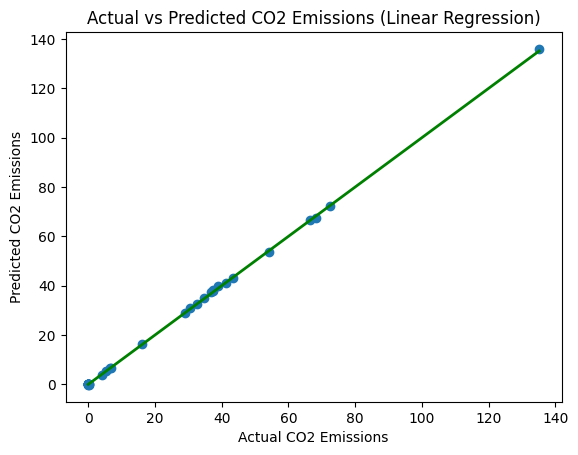

In [47]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='green', linewidth=2)  # Diagonal line
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions (Linear Regression)')
plt.show()

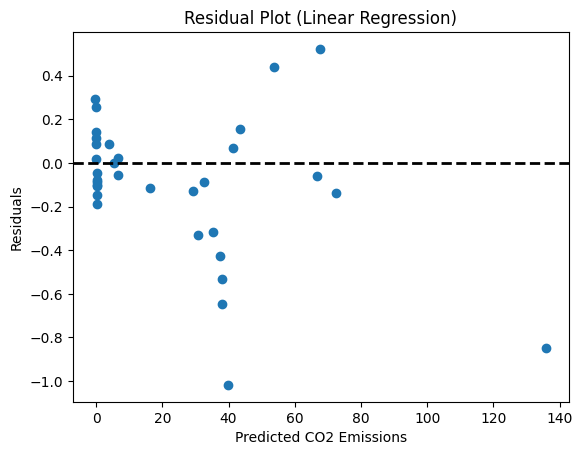

In [48]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted CO2 Emissions')
plt.ylabel('Residuals')
plt.title('Residual Plot (Linear Regression)')
plt.show()

In [49]:
# Assume the features for the next year are stored in a variable named 'X_next_year'
# Make sure 'X_next_year' has the same features and order as the training features ('year', 'population', 'gdp', 'coal_co2', 'oil_co2', 'gas_co2')

# Standardize the input features for the next year
# X_next_year_std = sc.transform(X_next_year)

# Predict CO2 emissions for the next year
# co2_prediction_next_year = linear_reg_model.predict(X_next_year_std)

# Print the predicted CO2 emissions for the next year
# print(f'Predicted CO2 Emissions for the Next Year: {co2_prediction_next_year}')

# Plot the predicted value
# plt.scatter(X_next_year['year'], co2_prediction_next_year, color='red', label='Predicted CO2 Emissions (Next Year)')
# plt.xlabel('Year')
# plt.ylabel('Predicted CO2 Emissions')
# plt.title('Predicted CO2 Emissions for the Next Year')
# plt.legend()
# plt.show()